# CHEN 2450 - Coding Activity 5
# Jacobi Iterative Solver
## Prof. Tony Saad

Use the Jacobi iterative solver to find the solution of the following system of equations:
\begin{equation}
\begin{bmatrix}
5 & 1 & 1\\ 
2 & 3 & 0\\ 
3 & 0 & 4
\end{bmatrix}
\begin{pmatrix}
x_1\\ 
x_2\\ 
x_3
\end{pmatrix}
=
\begin{pmatrix}
10\\ 
11\\ 
12
\end{pmatrix}
\end{equation}

$$
x_i = x_{guess, i}+\frac{b_i \mathbf{a}_i \mathbf{x}_{guess}}{a_{i i}}
$$

Below is an implementation of the Jacobi iterative solver

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.set_printoptions(precision=8)

In [2]:
def jacobi(A,b,xguess,maxIter):
    # Make sure A is a numpy array
    A = np.array(A)
    [nr,nc] = A.shape
    iter = 0 # counter
    sol  = np.zeros(nr) # declare x array
    while (iter < maxIter):
        # loop over the rows
        for i in range(0,nr):
            sol[i] = xguess[i] + 1.0/A[i][i] * (b[i] - A[i]@xguess)
        #make sure x and xguess are NOT the same
        xguess = sol.copy()
        iter +=1
    return sol

Define your coefficient matrix, RHS, initial guess, and max iterations

In [3]:
A = [[5,1,1],
     [2,3,0],
     [3,0,4]]
b = [10,11,12]
x0 = [0.0, 0.0, 0.0] # initial guess

Now call the Jacobi solver to solve this system of equations

In [4]:
jacobi(A,b,x0,50)

array([0.93023256, 3.04651163, 2.30232558])

In [5]:
np.linalg.solve(A, b)

array([0.93023256, 3.04651163, 2.30232558])

To gain more insight into what the solver is doing, modify the Jacobi routine to print out iteration number and the value of each iterate $x_i^k$

| iteration | x1   | x2   |
|-----------|------|------|
| 0         | 0.5  | 0.36 |
| 1         | 0.45 | 0.7  |

In [6]:
x1 = []
x2 = []
x3 = []

def jacobi2(A,b,xguess,maxIter):
    df = pd.DataFrame(columns=['x1', 'x2', 'x3'])
    # Make sure A is a numpy array
    A = np.array(A)
    [nr,nc] = A.shape
    iter = 0 # counter
    x  = np.zeros(nr) # declare x array
    print('i \t x1 \t x2 \t x3 \n')
    while (iter < maxIter):
        df = df.append({'x1': x[0], 'x2': x[1], 'x3': x[2]}, ignore_index=True)
        # loop over the rows
        for i in range(0,nr):
            x[i] = xguess[i] + 1.0/A[i][i] * (b[i] - A[i]@xguess)

        x1.append(x[0])
        x2.append(x[1])        
        x3.append(x[2])        
        #make sure x and xguess are NOT the same
        xguess = x.copy()
        iter +=1
    return df

Now experiment with different maximum iterations - what do you observe?

In [7]:
df = jacobi2(A,b,x0,20)
df

i 	 x1 	 x2 	 x3 



,x1,x2,x3
0,0.000000,0.000000,0.000000
1,2.000000,3.666667,3.000000
2,0.666667,2.333333,1.500000
3,1.233333,3.222222,2.500000
4,0.855556,2.844444,2.075000
5,1.016111,3.096296,2.358333
6,0.909074,2.989259,2.237917
7,0.954565,3.060617,2.318194
8,0.924238,3.030290,2.284076
9,0.937127,3.050508,2.306822


In [8]:
import matplotlib.pyplot as plt

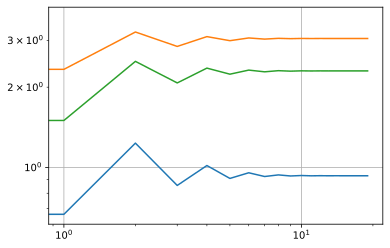

In [9]:
plt.loglog(x1)
plt.loglog(x2)
plt.loglog(x3)
plt.grid()

Clearly, we need a way to tell the solver to stop. A tolerance is useful in this case. Add an error measure to the Jacobi routine so that the solver stops at a certain tolerance.

In [21]:
x1 = []
x2 = []
x3 = []
def jacobi3(A,b,xguess,tol):
    # Make sure A is a numpy array
    A = np.array(A)
    [nr,nc] = A.shape
    error = np.linalg.norm(b - A@xguess, 2)
    print('error', error)
    iter = 0 # counter
    sol  = np.zeros(nr) # declare x array
    print('i \t x1 \t x2 \t x3 \t error \n')    
    while (error > tol):
        
        # loop over the rows
        for i in range(0,nr):
            sol[i] = xguess[i] + 1.0/A[i][i] * (b[i] - A[i]@xguess)

        error = np.linalg.norm(b - A@sol, 2)
        print(iter, '\t', sol,'\t\t', error)    
        #make sure x and xguess are NOT the same
        xguess = sol.copy()
        
        iter +=1
    return sol

In [22]:
jacobi3(A,b,x0,1e-2)

error 19.1049731745428
i 	 x1 	 x2 	 x3 	 error 

0 	 [2.         3.66666667 3.        ] 		 9.820613241770822
1 	 [0.66666667 2.33333333 1.5       ] 		 5.580223014261072
2 	 [1.23333333 3.22222222 2.5       ] 		 2.7825070851684006
3 	 [0.85555556 2.84444444 2.075     ] 		 1.58106318737397
4 	 [1.01611111 3.0962963  2.35833333] 		 0.7883770074643799
5 	 [0.90907407 2.98925926 2.23791667] 		 0.4479679030892909
6 	 [0.95456481 3.06061728 2.31819444] 		 0.2233734854482415
7 	 [0.92423765 3.03029012 2.28407639] 		 0.1269242392086355
8 	 [0.9371267  3.05050823 2.30682176] 		 0.06328915421033747
9 	 [0.928534   3.04191553 2.29715498] 		 0.035961867775781045
10 	 [0.9321859 3.047644  2.3035995] 		 0.017931927026263065
11 	 [0.9297513  3.0452094  2.30086058] 		 0.010189195869804737
12 	 [0.930786   3.04683247 2.30268652] 		 0.005080712657440219


array([0.930786  , 3.04683247, 2.30268652])

In [23]:
np.linalg.solve(A, b)

array([0.93023256, 3.04651163, 2.30232558])